# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
ds = pd.read_csv('/content/drive/MyDrive/Python Project/stock_data.csv')
# view the first 5 rows
ds.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [4]:
# view the last 5 rows
ds.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


## Data Overview

- Observations
- Sanity checks

In [5]:
#check the shape of the dataset
ds.shape

(340, 15)

In [6]:
print('The dataframe has', ds.shape[0], 'rows and', ds.shape[1],'columns.')

The dataframe has 340 rows and 15 columns.


In [7]:
# let's create a copy of the dataset
ds_copy= ds.copy()

In [8]:
# let's check the data types of the columns in the dataset
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are 15 columns in the dataset, 7 columns contain float64 datatypes, 4 columns contain object datatypes and 4 other columns contain int64 datatype.

In [9]:
# let's check for duplicate values in the data
ds_copy[ds_copy.duplicated()].count()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no duplicated values in the dataset

In [10]:
# Check the statistical summary of the data
ds_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

1. What does the distribution of stock prices look like?

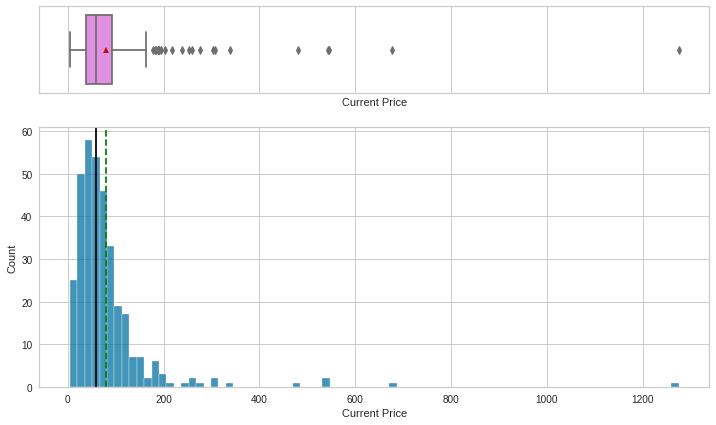

In [13]:
histogram_boxplot(ds_copy, "Current Price")

* The distribution of current stock prices is heavily skewed to the right.
* on average stock prices are closer to a 100USD.
* Majority of the stock prices fall within the range of 0-200 USD

2. The stocks of which economic sector have seen the maximum price increase on average?

In [14]:
ds_copy.groupby(['GICS Sector']).mean()['Price Change'].sort_values()

GICS Sector
Energy                        -10.228289
Utilities                       0.803657
Industrials                     2.833127
Financials                      3.865406
Materials                       5.589738
Consumer Discretionary          5.846093
Real Estate                     6.205548
Telecommunications Services     6.956980
Information Technology          7.217476
Consumer Staples                8.684750
Health Care                     9.585652
Name: Price Change, dtype: float64

* The sector that has seen the maximum price increase on average is the health care sector.

3. How are the different variables correlated with each other?

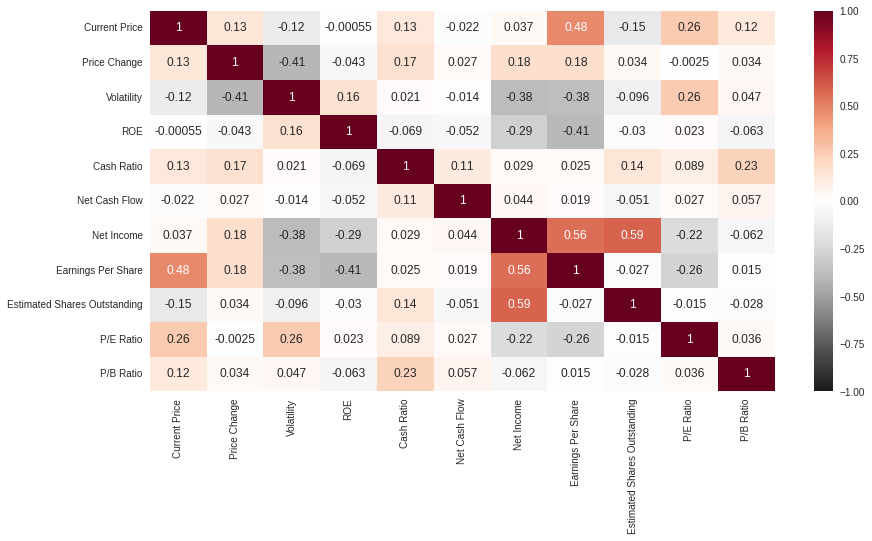

In [15]:
# Do a heatplot to check the correlatoion between the numerical variables
plt.figure(figsize=(14,7))
sns.heatmap(ds_copy.corr(),annot=True,cmap='RdGy_r',vmin=-1,vmax=1);

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

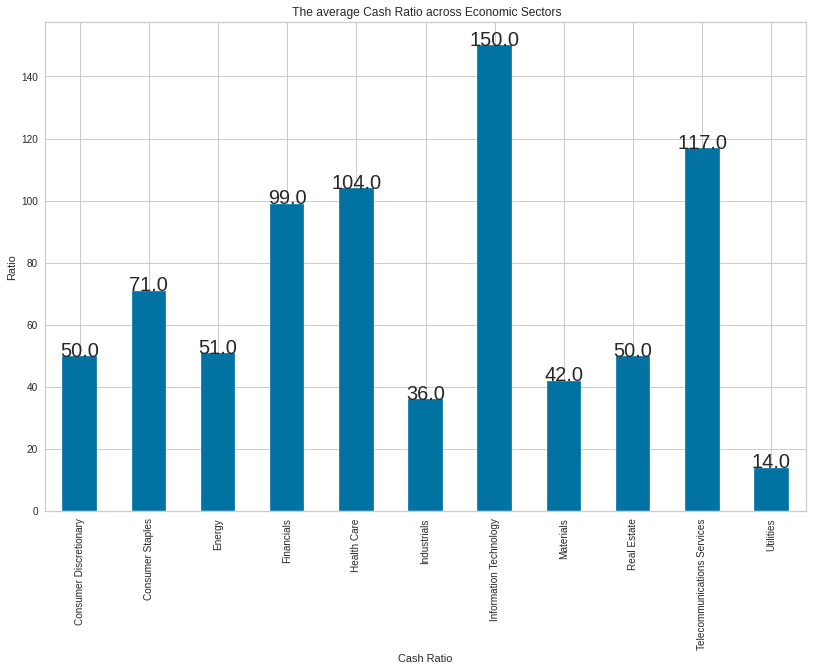

In [16]:
fig = plt.figure(figsize=(30,9));

fig.add_subplot(121)

# plot the barchart
ax = round(ds_copy.groupby(['GICS Sector']).mean()['Cash Ratio']).plot(kind="bar", rot=90)

# display counts on each bar
for p in ax.patches:
 label = p.get_height()  # count of each level of the category

 x = p.get_x() + p.get_width() / 2  # width of the plot
 y = p.get_height()  # height of the plot

    
 ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=20,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the number
 ax.set(xlabel='Cash Ratio', ylabel='Ratio'); #adding labels
plt.title(' The average Cash Ratio across Economic Sectors'); #adding title       
plt.show()

* Information Technology sector boasts of the highest average cash ratio with Telecomunication services coming in second.
* Utilities has the lowest average cash ratio.

5. How does the P/E ratio vary, on average, across economic sectors?

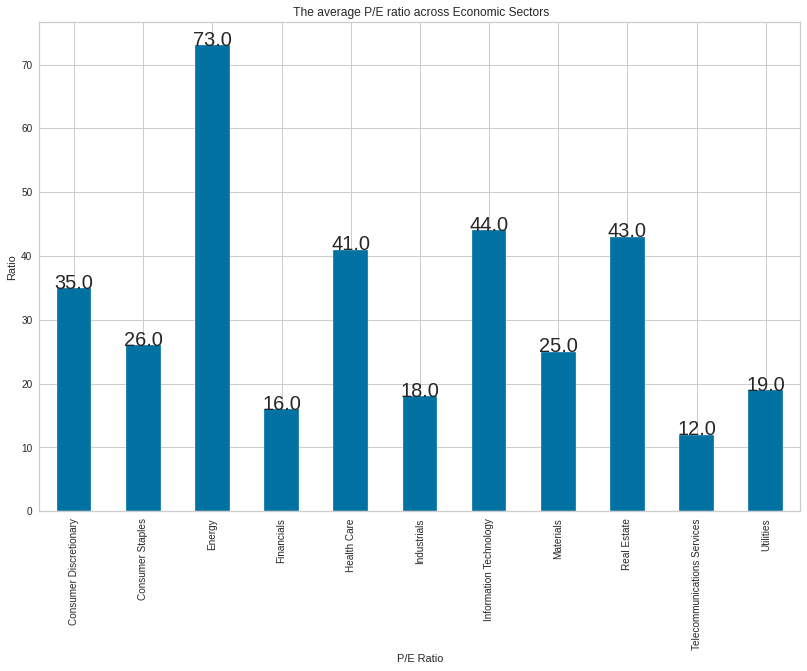

In [17]:
fig = plt.figure(figsize=(30,9));

fig.add_subplot(121)

# plot the barchart
ax = round(ds_copy.groupby(['GICS Sector']).mean()['P/E Ratio']).plot(kind="bar", rot=90)

# display counts on each bar
for p in ax.patches:
 label = p.get_height()  # count of each level of the category

 x = p.get_x() + p.get_width() / 2  # width of the plot
 y = p.get_height()  # height of the plot

    
 ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=20,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the number
 ax.set(xlabel='P/E Ratio', ylabel='Ratio'); #adding labels
plt.title(' The average P/E ratio across Economic Sectors'); #adding title       
plt.show()

* Energy sector boasts of the highest average P/E ratio with Information Technology coming in second.
* Telecomunications sector has the lowest average P/E ratio.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [18]:
# missing value check
ds_copy.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values in the dataframe.

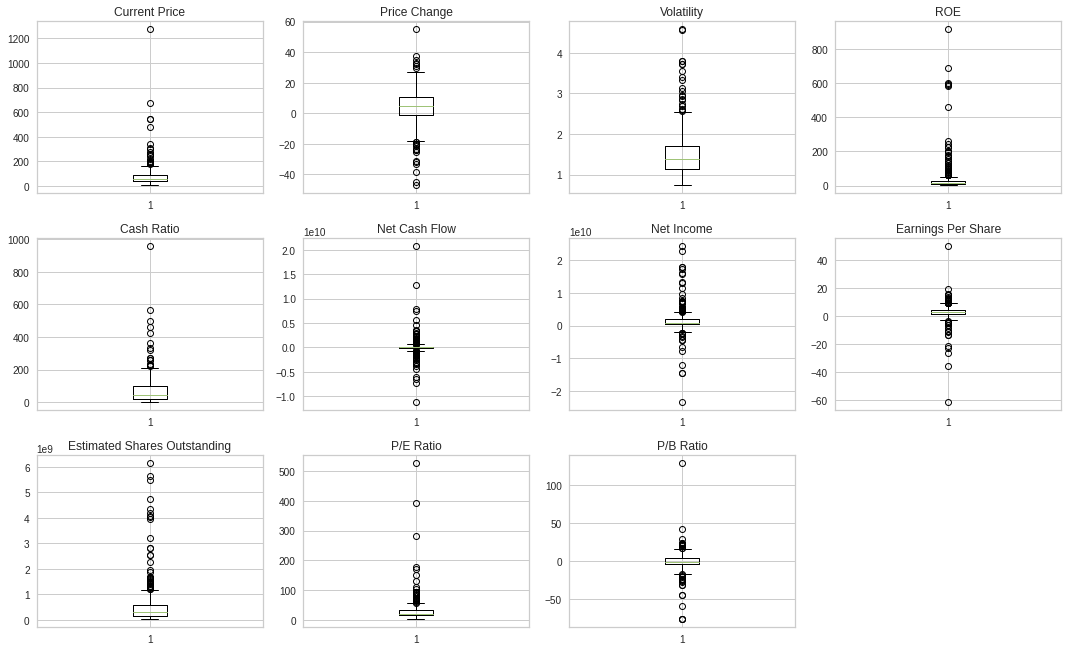

In [19]:
# outlier detection 
plt.figure(figsize=(15, 15))

for i, variable in enumerate(ds_copy.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(ds_copy[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* We will not be treating outliers as variance will be usefull in the data analysis.

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Histogram and Boxplot for all numerical columns

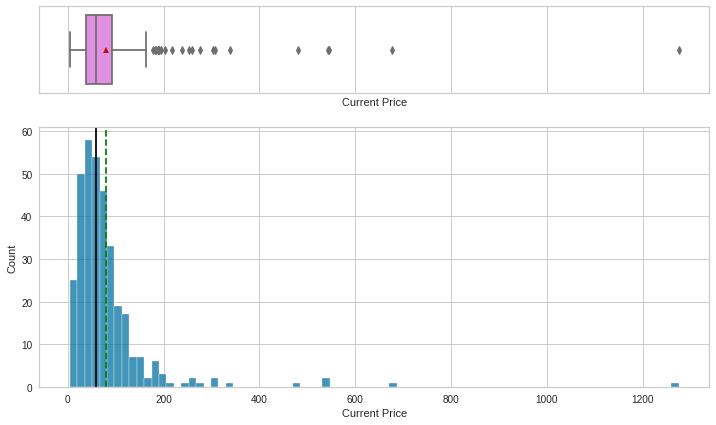

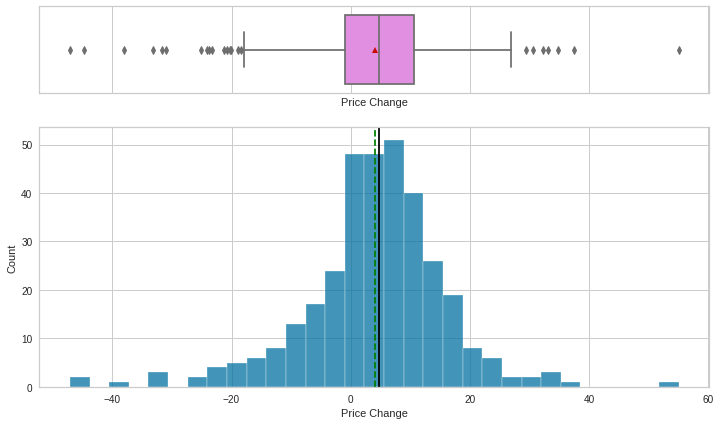

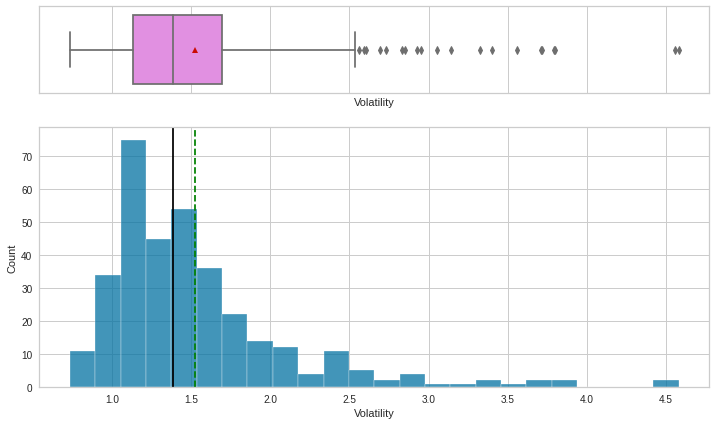

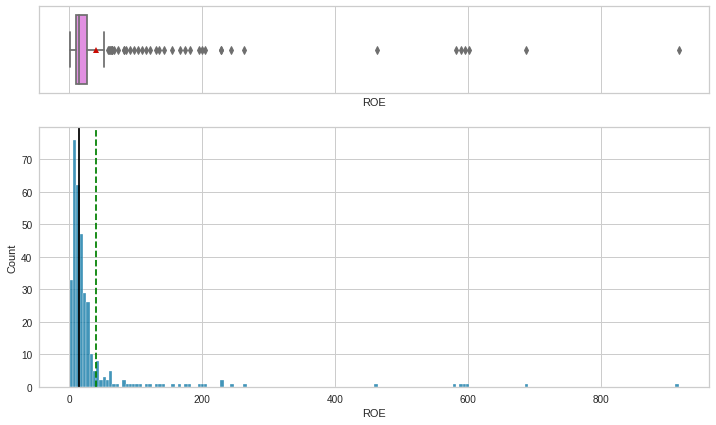

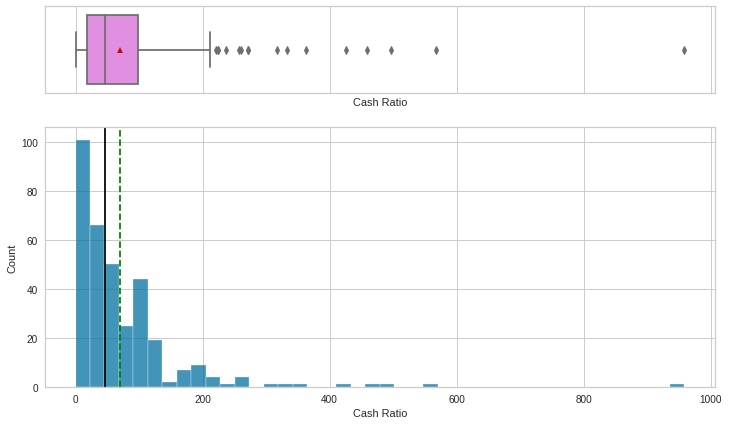

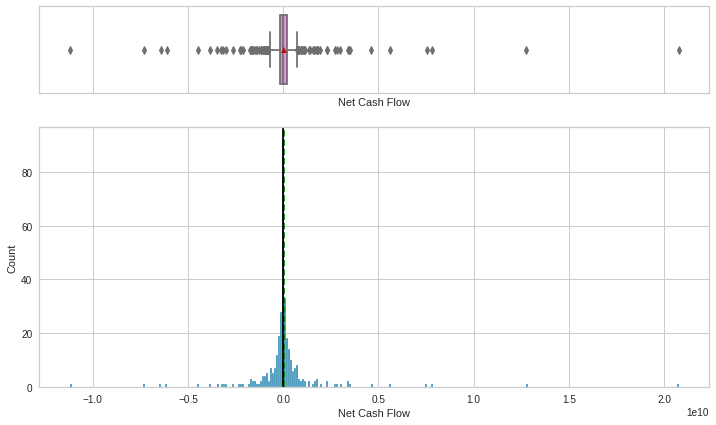

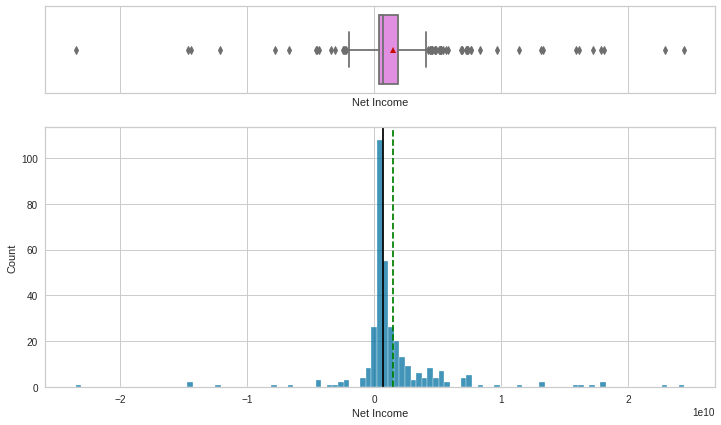

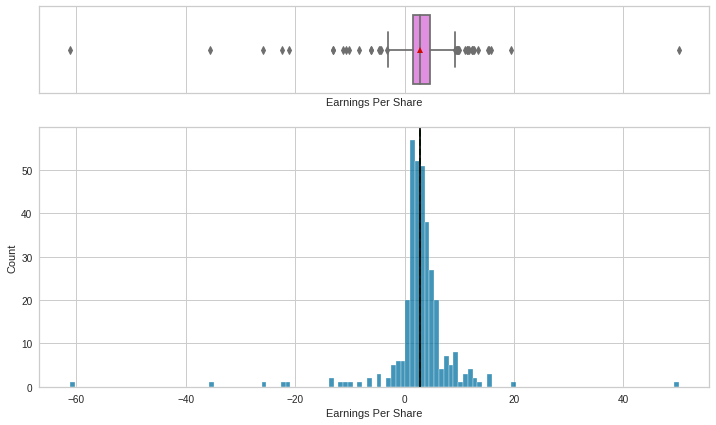

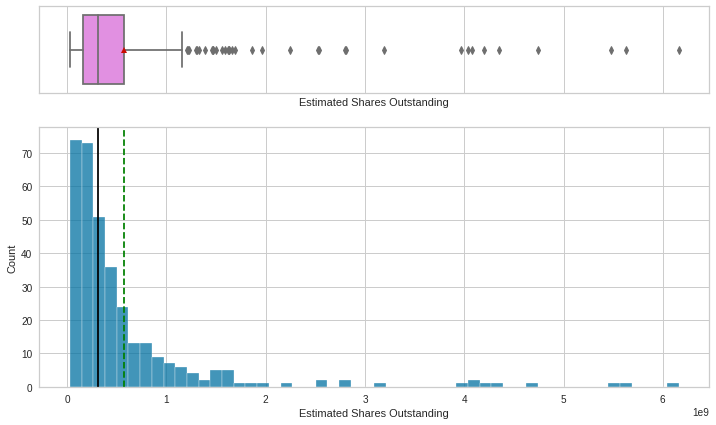

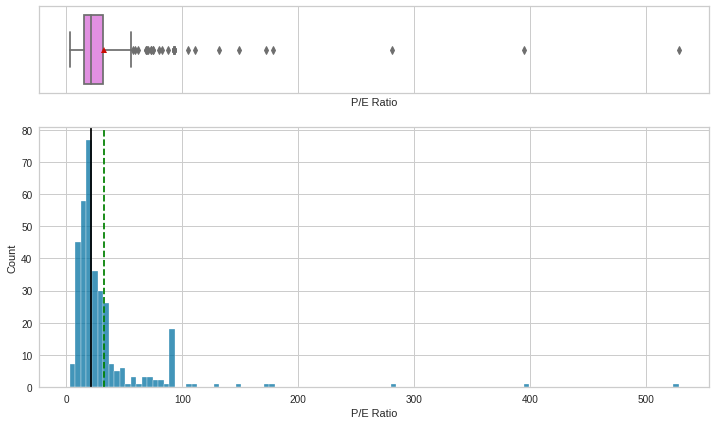

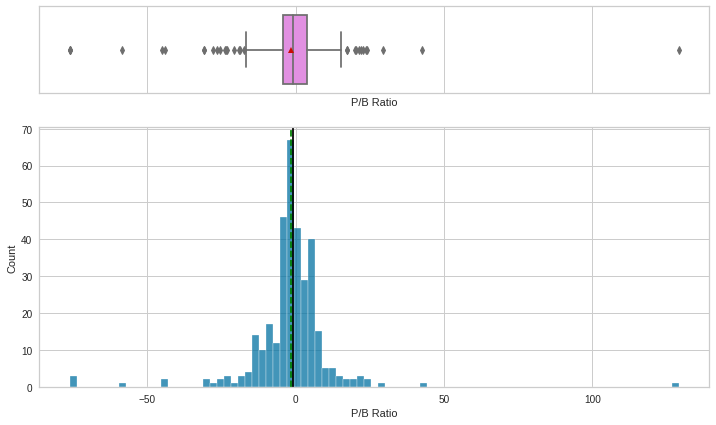

In [20]:
#create list of columns with numerical variables
num_col = ds_copy.select_dtypes(include=np.number).columns.tolist()

#display histograms and boxplots for all numerical columns
for col in num_col:
    histogram_boxplot(ds_copy, col)

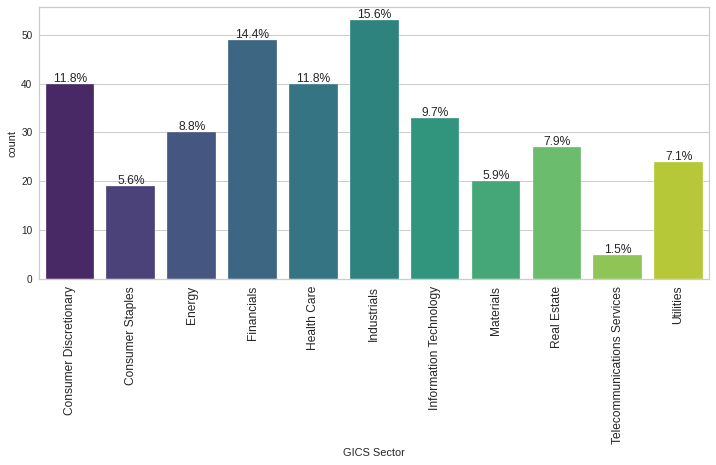

In [21]:
# Percentage of companies in each sector
labeled_barplot(ds_copy, "GICS Sector", perc=True)

* 15.6% of the companies belong to the industrial sector.
* Telecommunications sector has the least percentage (1.5%) of companies.

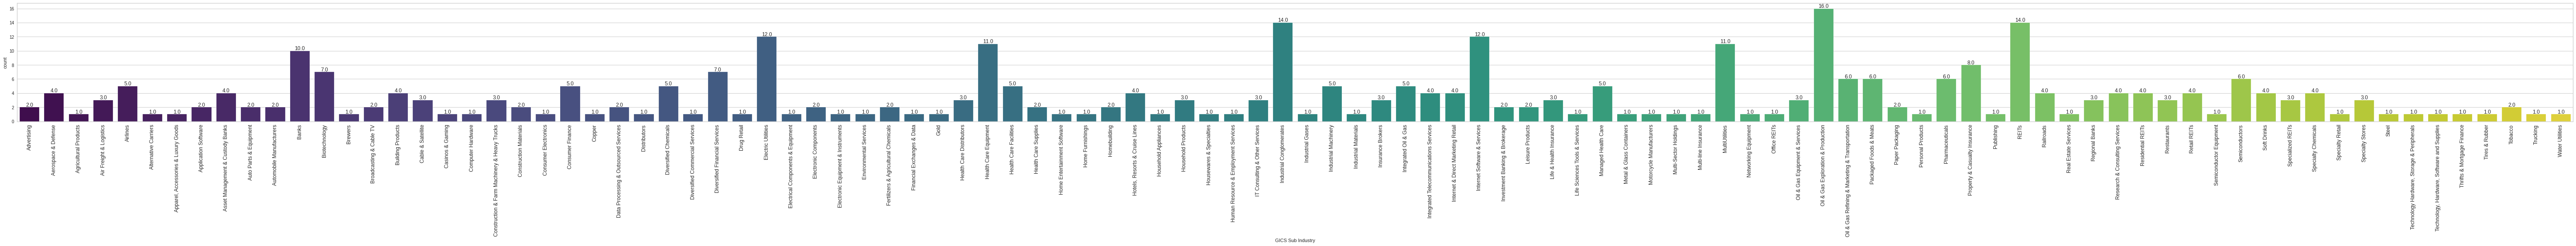

In [22]:
labeled_barplot(ds_copy, "GICS Sub Industry")

## K-means Clustering

In [23]:
#scaling the dataset before clustering
scaler = StandardScaler()
subset = ds_copy[num_col].copy()
scaled_subset = scaler.fit_transform(subset)

In [24]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(scaled_subset, columns=subset.columns)

## Elbow plot

In [25]:
# Create a copy of scaled dataframe
kmeans_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124


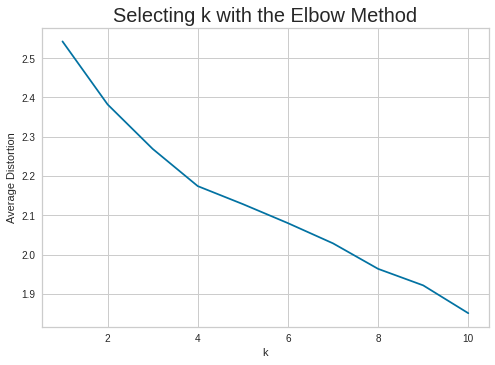

In [26]:
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(kmeans_df)
    distortion = (
        sum(np.min(cdist(kmeans_df, model.cluster_centers_, "euclidean"), axis=1))
        / kmeans_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

* There is a clear elbow bend at k=4, indicating 4 clusters to be the appropriate number of clusters.

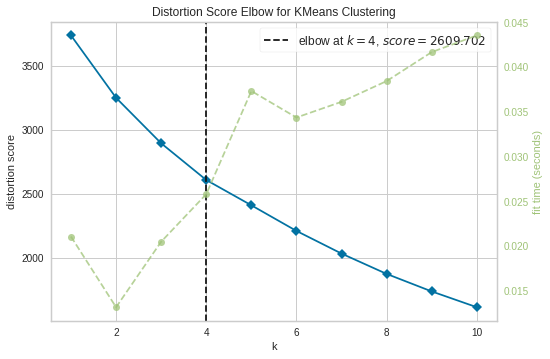

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Fit Kmeans model
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=True)
visualizer.fit(kmeans_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Silhouette score

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)


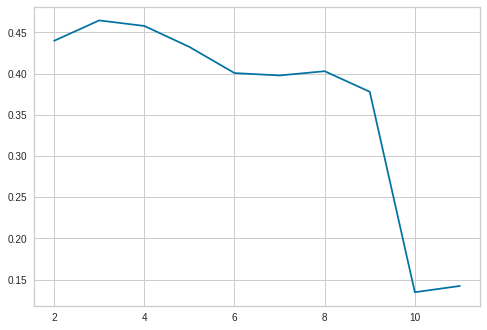

In [28]:
sil_score = []
cluster_list = range(2, 12)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(kmeans_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

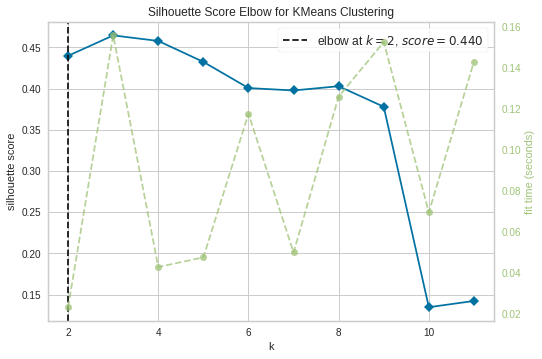

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
# Fit the kmeans model
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 12), metric="silhouette", timings=True)
visualizer.fit(kmeans_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

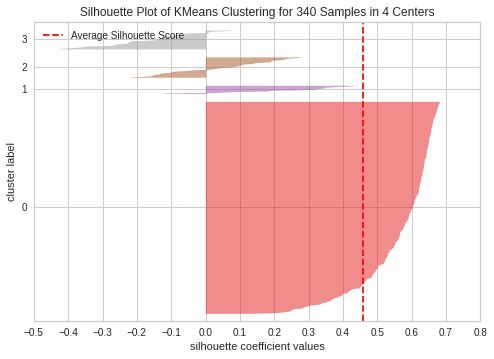

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(kmeans_df)
visualizer.show()

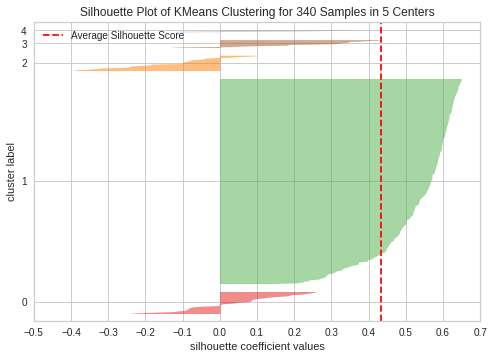

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(kmeans_df)
visualizer.show()

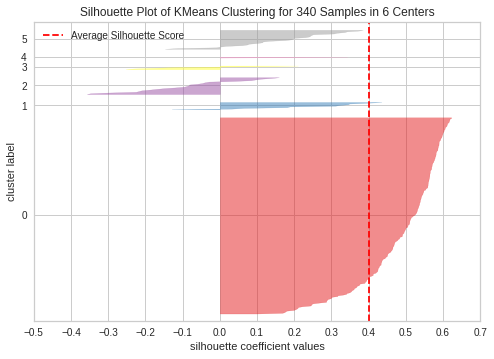

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(kmeans_df)
visualizer.show()

*Let's take 4 as the appropriate number of clusters based off of high silhouette score nand there is knick at 4 in the elbow curve.

### Creating model

In [33]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [34]:
# adding kmeans cluster labels to the original and scaled dataframes
kmeans_df["KM_segments"] = kmeans.labels_
ds_copy["KM_segments"] = kmeans.labels_

### Cluster profiling

In [35]:
#grouping the dataset by kmeans cluster labels
kmeans_cluster_profile = ds_copy.groupby("KM_segments").mean()

In [36]:
kmeans_cluster_profile["Count"] = (
    ds_copy.groupby("KM_segments")["Security"].count().values
)

In [37]:
kmeans_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [38]:
# print the names of the companies in each cluster
for cl in ds_copy["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(ds_copy[ds_copy["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [39]:
ds_copy.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

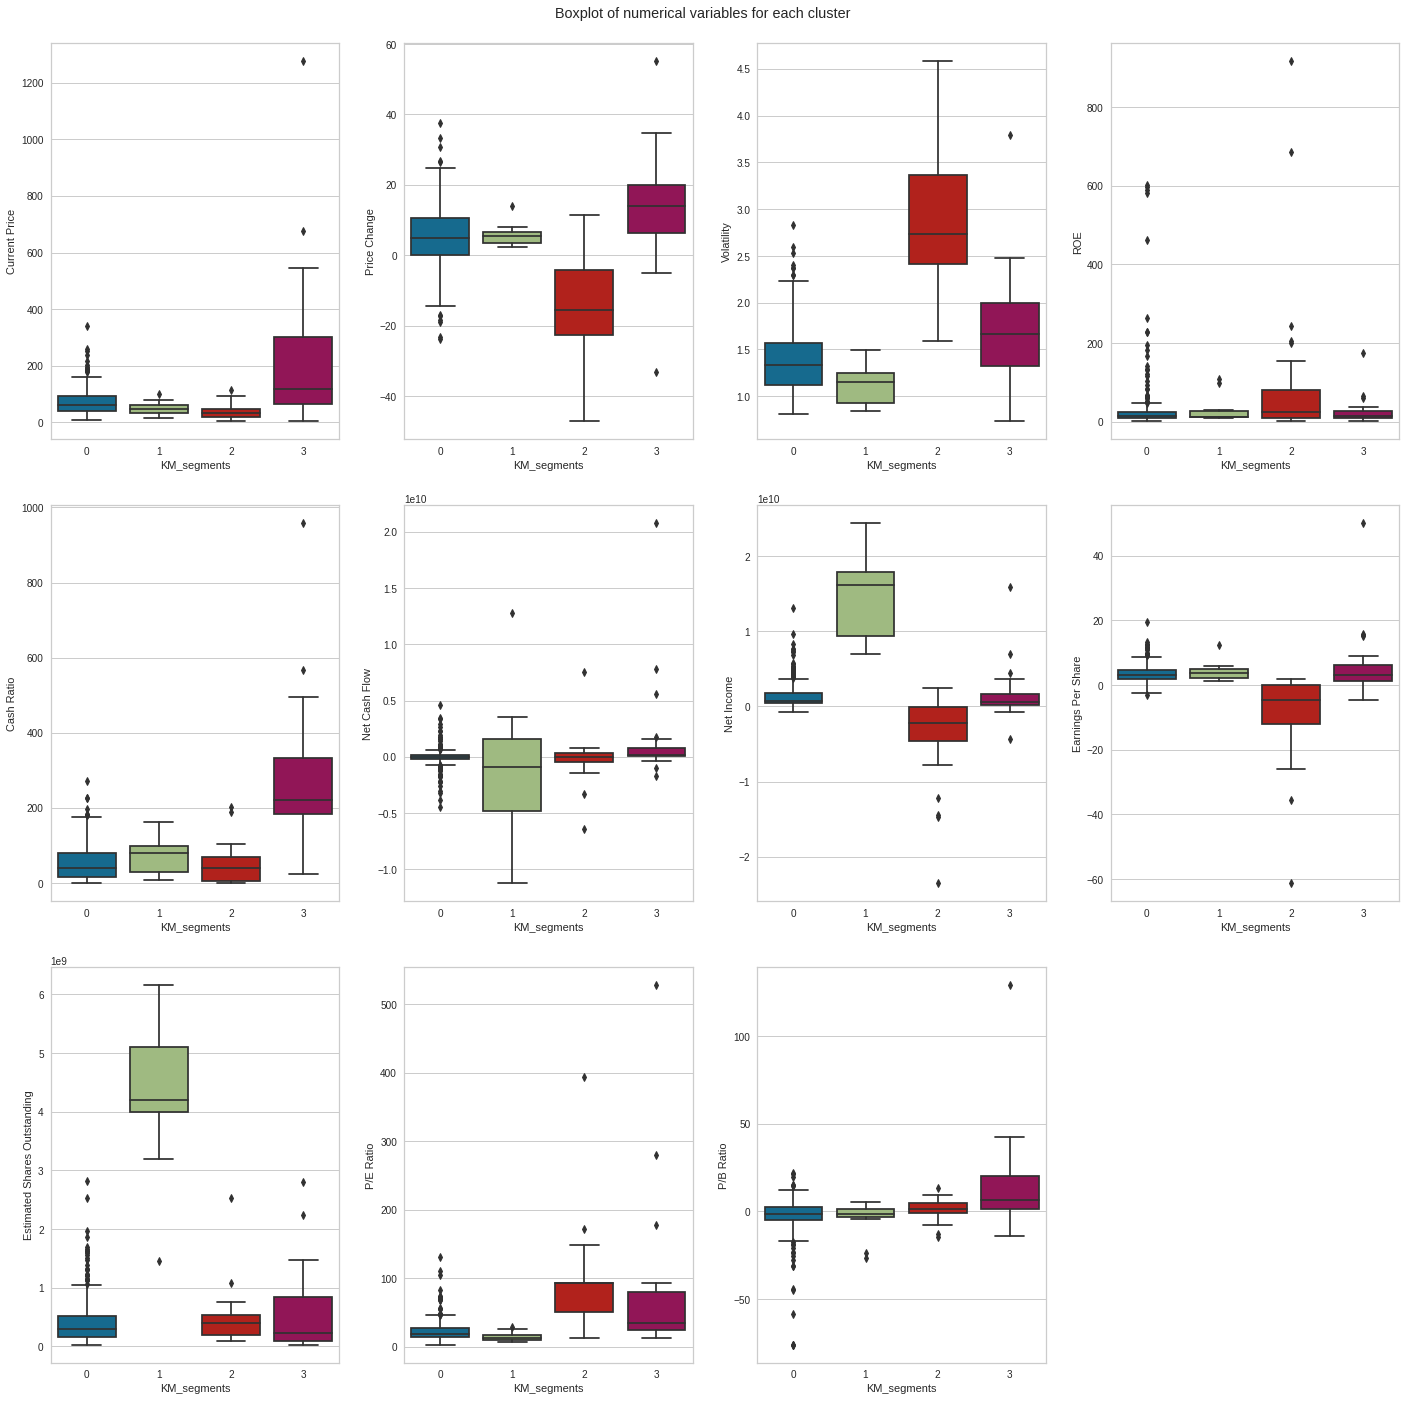

In [40]:
# boxplots of numerical variables for each K-Means cluster
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = ds.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=ds_copy, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

**Cluster 0**
* 277 companies fall under cluster 0
* The companies in this cluster are spread out amongst different sectors.
* companies in this cluster have negative P/B ratio which means the have more liabilities than assets.

**Cluster 1**
* 11 companies fall under cluster 1
* The companies in this cluster are spread out amongst different sectors.
*  This companies stock generates a negative net cash flow which means it finds it difficult to cover its expenses from sales.
* Companies in this cluster have the highest Net income  and Estimated share outstanding.
* Companies in this cluster have negative P/B ratio which means the have more liabilities than assets.

**Cluster 2**
* 27 companies fall under cluster 2
* Majority of the companies in this cluster are in the energy sector with the remaining few being in the information technology,health care, financials and telecomunication setors.
* The companies in this cluster have the highest average  return on investment and Volatility.


**cluster 3**
* 25 companies fall under cluster 3
* The company in this cluster has the highest Current price, Price change,Cash ratio, Net cash flow, Earnings per share, P/B Ratio
* The companies in this cluster are spread out amongst different sectors.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [41]:
# Creare hierarchical cluster datafrae
hcluster_df = subset_scaled_df.copy()

In [42]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hcluster_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hcluster_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Let's explore different linkage methods with Euclidean distance only.**

In [43]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hcluster_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hcluster_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### Plotting Dendrograms

Note: The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it corresponds to distinct and homogeneous clusters. Let us see the dendrograms for the different linkage methods when the measure of distance is euclidean.

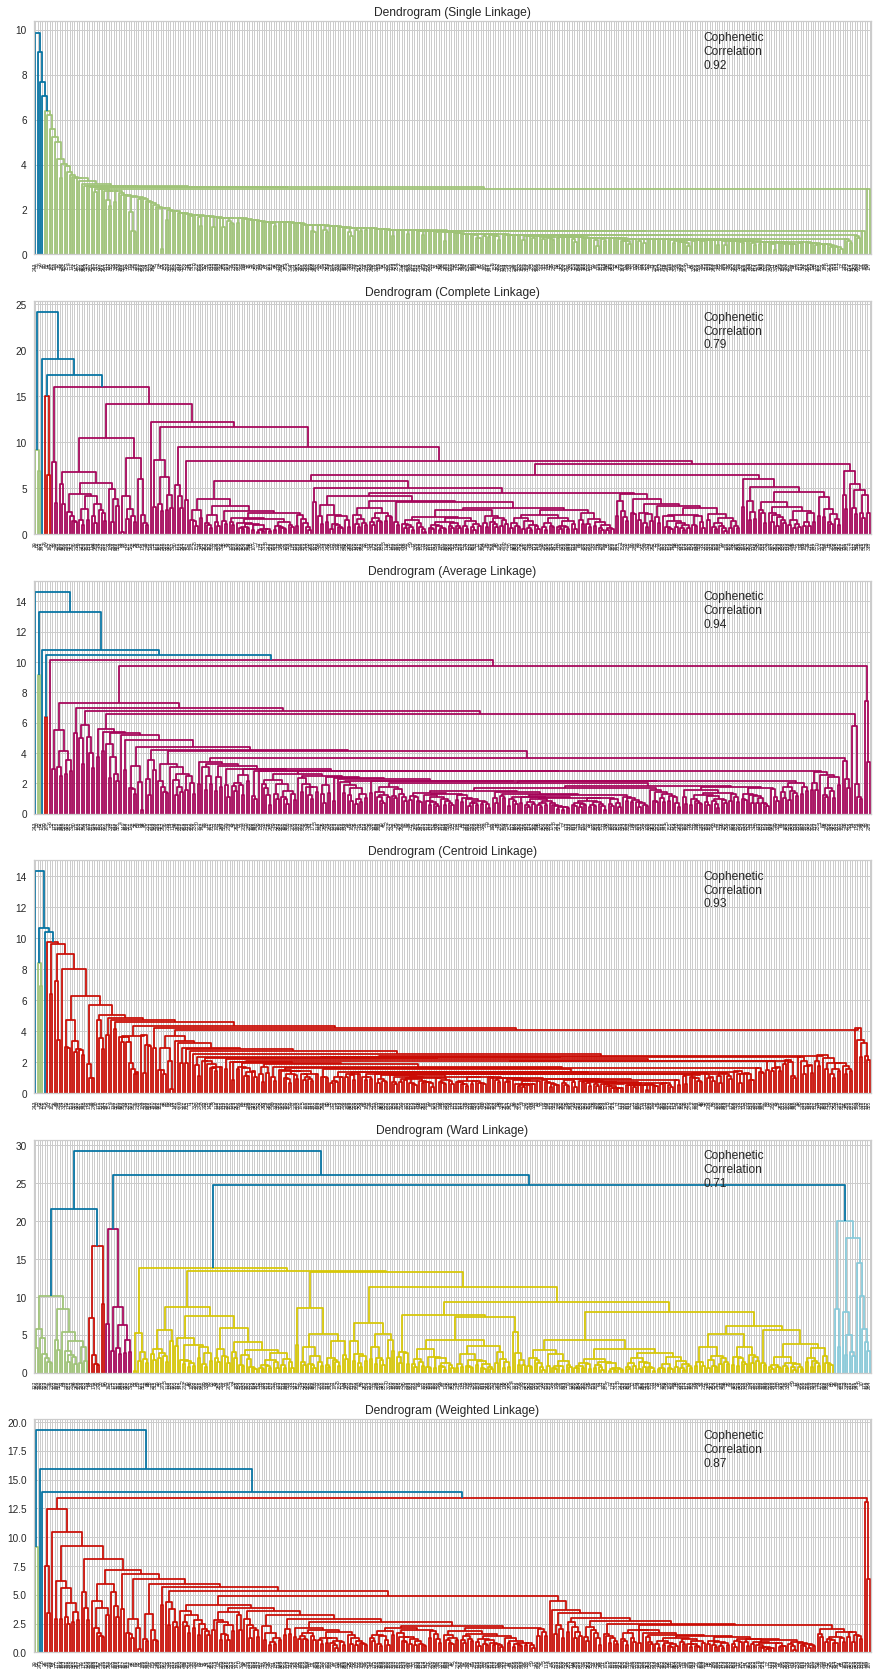

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hcluster_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hcluster_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

* The cophenetic correlation is highest for average and centroid linkage methods for euclidean distance.
* We will proceed with average linkage.
* 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn

In [45]:
HC_model = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HC_model.fit(hcluster_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [46]:
# creating a copy of the original data
ds2 = ds.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hcluster_df["HC_segments"] = HC_model.labels_
ds2["HC_segments"] = HC_model.labels_

### Cluster Profiling

In [47]:
hcluster_profile = ds2.groupby("HC_segments").mean()

In [48]:
# counts for number of stocks in each cluster
hcluster_profile["Count"] = (
    ds2.groupby("HC_segments")["Security"].count().values
)

In [49]:
hcluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
HC_segments,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


In [50]:
for cl in ds2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(ds2[ds2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [51]:
ds2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         32
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
Name: Security, dtype: int64

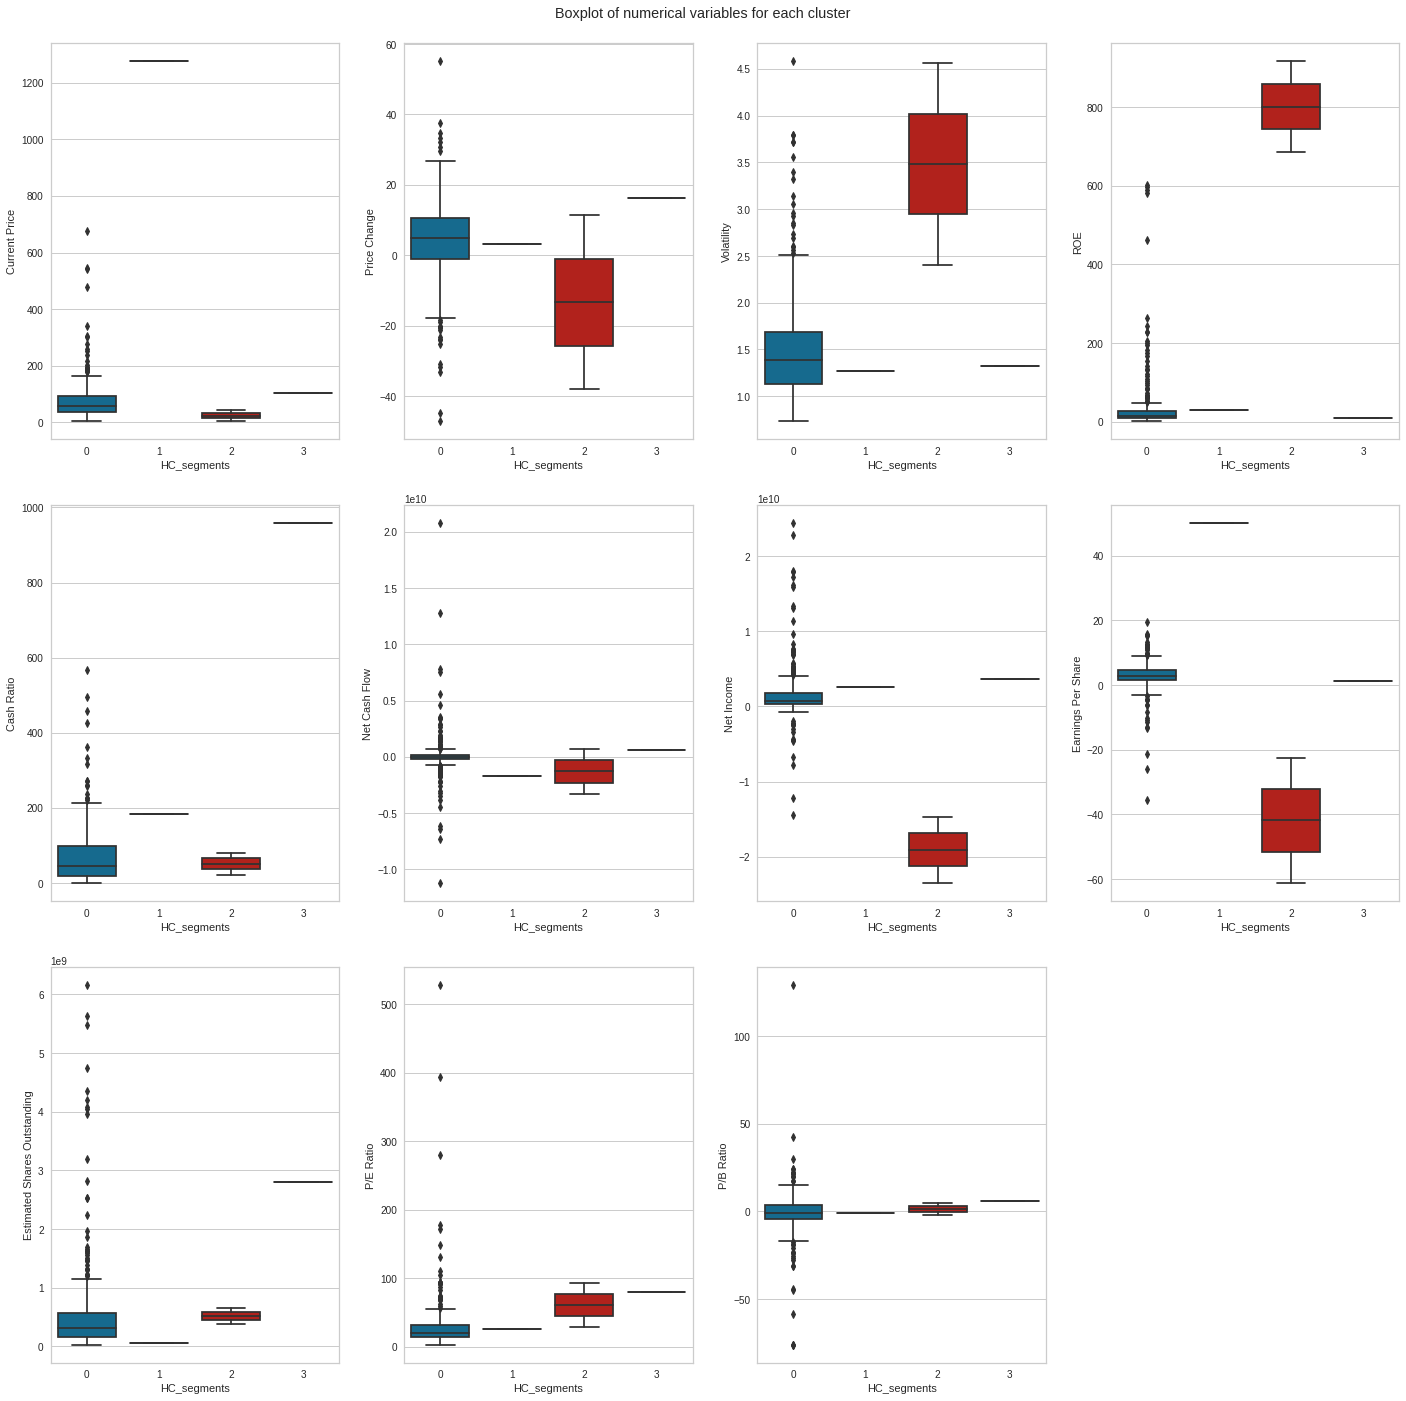

In [52]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=ds2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Cluster 0**
* 336 companies fall under cluster 0
* The companies in this cluster are spread out amongst different sectors.
* companies in this cluster are significant outliers in P/E ratio.


**cluster 1**
* 1 company falls under cluster 1
* The company in this cluster has stocks with the highest current price
* The company in this cluster has the highest price per share.
* This companies stock generates a negative net cash flow which means it finds it difficult to cover its expenses from sales.
* The company in this cluster falls  under the customer discretionary sector. 

**cluster 2**
* 2 companies fall under cluster 2
* The companies in this cluster have the highest average  return on investment and Volatility.
* The companies in this cluster have a negative price change indicating prices of their stocks have been declining for a while.
* The companies in this cluster have a negative earning per share which supports the fact that their stocks have plumetted and their stocks are selling cheaper than they were bought.
* The companies in this cluster fall  under the energy  sector. 

**Cluster 3**
* 1 company fall under cluster 3
* The company in this cluster has the highest Cash ratio, Price per change, Net cash flow, Net income,Estimated Shares Outstanding, P/E Ratio, P/B Ratio
* The company in this cluster falls  under the Information Technology sector. 

### Dimensionality Reduction using PCA for visualization

In [53]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [54]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.3712899567725855

* The first two principal components explain 37.1% of the variance in the data.

<Axes: xlabel='Component 1', ylabel='Component 2'>

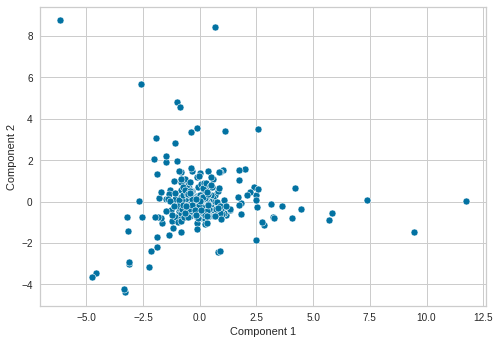

In [55]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

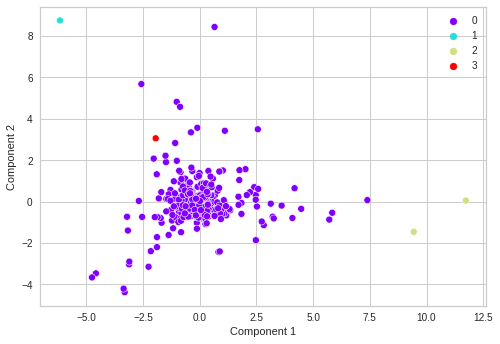

In [56]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=ds2["HC_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

* Cluster 0 and 3 are the major clusters.
* The rest of the data points seem to be mostly outliers.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**1) Which clustering technique took less time for execution?**
* Both the K-means clustering technique and the Hierarchical clustering methods took approximately the same time to execute.


**2)Which clustering technique gave you more distinct clusters, or are they the same?**
* The two clustering techniques gave the same number of clusters  although the k-means cluster technique gave more distinct clusters.
* in both methods, one cluster had majority of the stocks.

**3) How many observations are there in the similar clusters of both algorithms?**
* 1 cluster (cluster 0) had the majority of stocks in both clustering methods, whilst the other 3 clusters had a range of 1-27 stocks in each cluster for the both methods.

**4)How many clusters are obtained as the appropriate number of clusters from both algorithms?**
* 4 clusters were obtained as the appropriate number of clusters for the 2 methods.

## Actionable Insights and Recommendations
* Trade&Ahead should recommend stock portfolios to it's clients based on the above suggested clusters that fit their customer's gathered profile(financial goals, risk tolerance,amount of shares intrested in, investment behaviour e.t.c)
* Trade and ahead can also use the clusters to determine the best stocks to buy and sell at eah time based on their  average performance for each metric.